# Setup

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# from google.colab import drive

# drive.mount('/content/drive/')

In [9]:
# !unzip /home/jupyter/AI_Engineering/robot/Datasets/zip/robot.zip

for n in os.listdir("/home/jupyter/AI_Engineering/robot/robot/rawData/"):
	if ".zip" in n:
		!unzip /home/jupyter/AI_Engineering/robot/robot/rawData/{n} <<< "y"

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/AI_Engineering/robot/robot/rawData/'

In [ ]:
zip_path = "/home/jupyter/AI_Engineering/robot/Datasets/zip/robot.zip"
base_path = "/home/jupyter/AI_Engineering/robot"
#base_path = "/content/drive/MyDrive/Challenge-Engineering"
raw_data_path = base_path + "/Datasets"
dataset_path = base_path + "/Datasets"

In [ ]:
dataset_names = list(os.listdir(dataset_path))

print(dataset_names)

['noPayload', 'zip', 'nominal', 'test', 'dryBearing', 'Oil leakage']


In [ ]:
## opening files
datasets = dict()

columns = ["E1", "E2", "E3", "E4", "E5", "E6", "P1", "P2", "P3", "P4", "P5", "P6", "LOG", "TIMESTAMP", "CICLO"]
power_columns = ["E1", "E2", "E3", "E4", "E5", "E6"]
position_columns = ["P1", "P2", "P3", "P4", "P5", "P6"]

for dataset_name in dataset_names:

    path = dataset_path + "/" + dataset_name + "/"

    datasets[dataset_name] = [ pd.read_csv(path + d, sep=";", names=columns)   for d in os.listdir(path) if d.endswith(".csv") ]

In [ ]:
for k, v in datasets.items():
    print(f"dataset: {k}, num files: {len(v)}, tot_len: {sum(len(ds) for ds in v)}")

dataset: noPayload, num files: 10, tot_len: 186388
dataset: zip, num files: 0, tot_len: 0
dataset: nominal, num files: 20, tot_len: 374290
dataset: test, num files: 15, tot_len: 280544
dataset: dryBearing, num files: 10, tot_len: 188407
dataset: Oil leakage, num files: 10, tot_len: 187108


In [ ]:
## changing names...
datasets["oil"] = datasets.pop("Oil leakage")
datasets["dry"] = datasets.pop("dryBearing")
datasets["nop"] = datasets.pop("noPayload")

print(datasets.keys())

dict_keys(['zip', 'nominal', 'test', 'oil', 'dry', 'nop'])


In [ ]:
## transform to datetime
for k, df_list in datasets.items():
    for df in df_list:
        df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

# Study Datasets

In [ ]:
for df in datasets["oil"]:
    ## check if difference of times is always 0.002 s
    delta_t = df["TIMESTAMP"].diff().dropna().unique().astype(float) / 1e9

    print(df["LOG"].unique(), df["CICLO"].unique(), df["TIMESTAMP"].min(), df["TIMESTAMP"].max(), f" --> unique delta times {delta_t}, len : {len(df)}")

TypeError: Cannot cast TimedeltaArray to dtype float64

In [ ]:
for df in datasets["dry"]:
    ## check if difference of times is always 0.002 s
    delta_t = df["TIMESTAMP"].diff().dropna().unique().astype(float) / 1e9

    print(df["LOG"].unique(), df["CICLO"].unique(), df["TIMESTAMP"].min(), df["TIMESTAMP"].max(), f" --> unique delta times {delta_t}, len : {len(df)}")

[1] [2] 2016-12-02 14:16:03 2016-12-02 14:16:40.542000  --> unique delta times [0.002], len : 18772
[1] [3] 2016-12-02 14:16:59 2016-12-02 14:17:36.742000  --> unique delta times [0.002], len : 18872
[1] [4] 2016-12-02 14:17:55 2016-12-02 14:18:32.780000  --> unique delta times [0.002], len : 18891
[1] [5] 2016-12-02 14:18:51 2016-12-02 14:19:28.702000  --> unique delta times [0.002], len : 18852
[1] [6] 2016-12-02 14:19:48 2016-12-02 14:20:25.582000  --> unique delta times [0.002], len : 18792
[1] [7] 2016-12-02 14:20:44 2016-12-02 14:21:21.982000  --> unique delta times [0.002], len : 18992
[1] [8] 2016-12-02 14:21:41 2016-12-02 14:22:18.662000  --> unique delta times [0.002], len : 18832
[1] [9] 2016-12-02 14:22:37 2016-12-02 14:23:14.522000  --> unique delta times [0.002], len : 18762
[1] [10] 2016-12-02 14:23:33 2016-12-02 14:24:10.820000  --> unique delta times [0.002], len : 18911
[1] [11] 2016-12-02 14:24:30 2016-12-02 14:25:07.460000  --> unique delta times [0.002], len : 1873

In [ ]:
for df in datasets["nop"]:
    ## check if difference of times is always 0.002 s
    delta_t = df["TIMESTAMP"].diff().dropna().unique().astype(float) / 1e9

    print(df["LOG"].unique(), df["CICLO"].unique(), df["TIMESTAMP"].min(), df["TIMESTAMP"].max(), f" --> unique delta times {delta_t}, len : {len(df)}")

[1] [2] 2016-11-21 14:20:28 2016-11-21 14:21:05.100000  --> unique delta times [0.002], len : 18551
[1] [3] 2016-11-21 14:21:24 2016-11-21 14:22:00.842000  --> unique delta times [0.002], len : 18422
[1] [4] 2016-11-21 14:22:19 2016-11-21 14:22:56.262000  --> unique delta times [0.002], len : 18632
[1] [5] 2016-11-21 14:23:15 2016-11-21 14:23:52.342000  --> unique delta times [0.002], len : 18672
[1] [6] 2016-11-21 14:24:11 2016-11-21 14:24:47.942000  --> unique delta times [0.002], len : 18472
[1] [7] 2016-11-21 14:25:07 2016-11-21 14:25:44.582000  --> unique delta times [0.002], len : 18792
[1] [8] 2016-11-21 14:26:03 2016-11-21 14:26:40.342000  --> unique delta times [0.002], len : 18672
[1] [9] 2016-11-21 14:26:59 2016-11-21 14:27:36.500000  --> unique delta times [0.002], len : 18751
[1] [10] 2016-11-21 14:27:56 2016-11-21 14:28:33.442000  --> unique delta times [0.002], len : 18722
[1] [11] 2016-11-21 14:28:52 2016-11-21 14:29:29.402000  --> unique delta times [0.002], len : 1870

In [ ]:
for df in datasets["nominal"]:
    ## check if difference of times is always 0.002 s
    delta_t = df["TIMESTAMP"].diff().dropna().unique().astype(float) / 1e9

    print(df["LOG"].unique(), df["CICLO"].unique(), df["TIMESTAMP"].min(), df["TIMESTAMP"].max(), f" --> unique delta times {delta_t}, len : {len(df)}")

[1] [2] 2016-11-20 11:45:43 2016-11-20 11:46:20.442000  --> unique delta times [0.002], len : 18722
[1] [3] 2016-11-20 11:46:39 2016-11-20 11:47:16.222000  --> unique delta times [0.002], len : 18612
[1] [4] 2016-11-20 11:47:35 2016-11-20 11:48:12.402000  --> unique delta times [0.002], len : 18702
[1] [5] 2016-11-20 11:48:31 2016-11-20 11:49:08.262000  --> unique delta times [0.002], len : 18632
[1] [6] 2016-11-20 11:49:27 2016-11-20 11:50:03.962000  --> unique delta times [0.002], len : 18482
[1] [7] 2016-11-20 11:50:23 2016-11-20 11:51:00.262000  --> unique delta times [0.002], len : 18632
[1] [8] 2016-11-20 11:51:19 2016-11-20 11:51:56.202000  --> unique delta times [0.002], len : 18602
[1] [9] 2016-11-20 11:52:15 2016-11-20 11:52:52.562000  --> unique delta times [0.002], len : 18782
[1] [10] 2016-11-20 11:53:11 2016-11-20 11:53:48.382000  --> unique delta times [0.002], len : 18692
[1] [11] 2016-11-20 11:54:07 2016-11-20 11:54:44.322000  --> unique delta times [0.002], len : 1866

In [ ]:
for df in datasets["test"]:
    ## check if difference of times is always 0.002 s
    delta_t = df["TIMESTAMP"].diff().dropna().unique().astype(float) / 1e9

    print(df["LOG"].unique(), df["CICLO"].unique(), df["TIMESTAMP"].min(), df["TIMESTAMP"].max(), f" --> unique delta times {delta_t}, len : {len(df)}")

[1] [2] 2016-11-28 15:04:02 2016-11-28 15:04:39.442000  --> unique delta times [0.002], len : 18722
[1] [3] 2016-11-28 16:08:34 2016-11-28 16:09:11.762000  --> unique delta times [0.002], len : 18882
[1] [4] 2016-11-28 17:03:50 2016-11-28 17:04:27.500000  --> unique delta times [0.002], len : 18751
[1] [5] 2016-11-28 18:09:13 2016-11-28 18:09:50.522000  --> unique delta times [0.002], len : 18762
[1] [6] 2016-11-28 19:13:42 2016-11-28 19:14:19.180000  --> unique delta times [0.002], len : 18591
[1] [7] 2016-11-28 20:17:56 2016-11-28 20:18:33.680000  --> unique delta times [0.002], len : 18841
[1] [8] 2016-11-29 08:01:12 2016-11-29 08:01:49.420000  --> unique delta times [0.002], len : 18711
[1] [9] 2016-11-29 08:15:15 2016-11-29 08:15:52.600000  --> unique delta times [0.002], len : 18801
[1] [10] 2016-11-29 08:30:13 2016-11-29 08:30:50.342000  --> unique delta times [0.002], len : 18672
[1] [11] 2016-11-29 08:45:11 2016-11-29 08:45:48.402000  --> unique delta times [0.002], len : 1870

In [ ]:
## concat dataset + FILL missing TIMESTAMP
dt = pd.Timedelta(milliseconds=2)

for k, v in datasets.items():

    if k == "test":
        continue ## ram crash

    datasets[k] = pd.concat(datasets[k], ignore_index = True)

    datasets[k].index = datasets[k]["TIMESTAMP"]

    print(k, "initially ", len(datasets[k]))

    ## resample to 2 ms frequency
    datasets[k] = datasets[k].asfreq(dt, method="pad")

    print(k, "finally", len(datasets[k]))

nominal initially  374290
nominal finally 551782
oil initially  187108
oil finally 271692
dry initially  188407
dry finally 272231
nop initially  186388
nop finally 270702


<Figure size 1200x600 with 0 Axes>

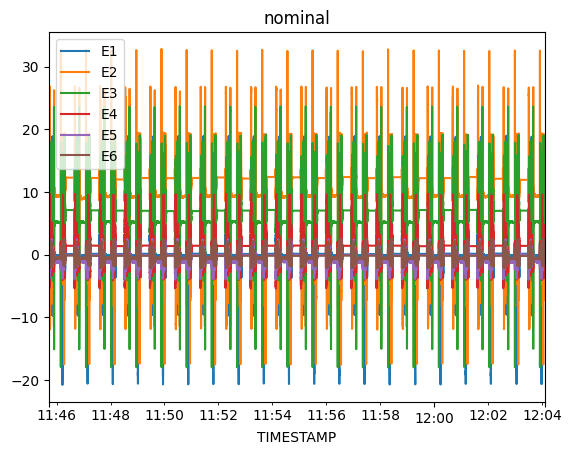

<Figure size 1200x600 with 0 Axes>

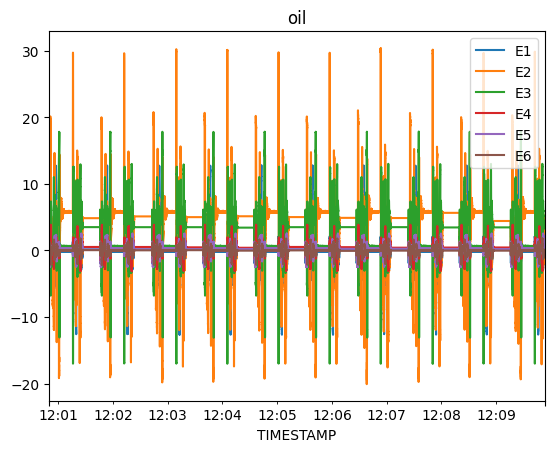

<Figure size 1200x600 with 0 Axes>

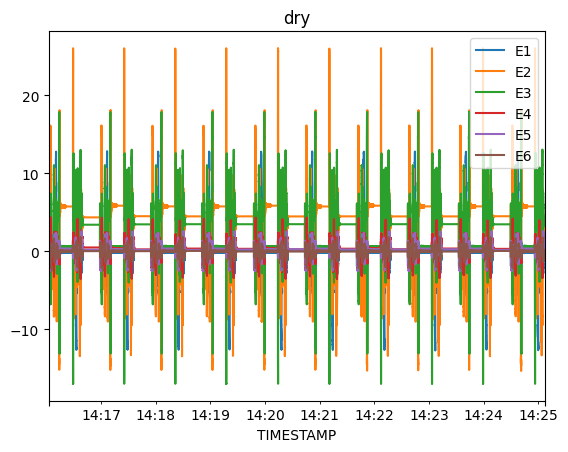

<Figure size 1200x600 with 0 Axes>

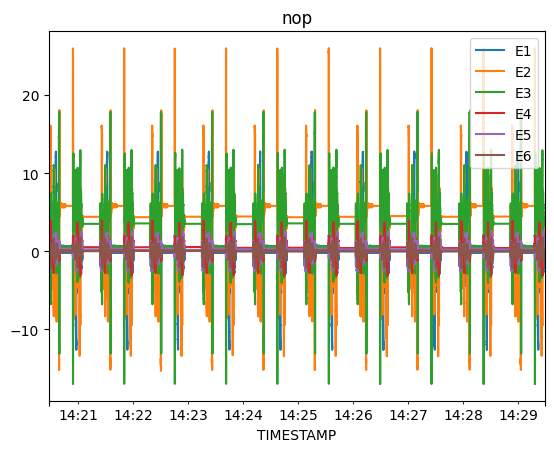

In [ ]:
for k, df in datasets.items():

    if k == "test":
        continue

    # plt.figure(figsize=(12, 6))
    # df[position_columns].plot(title = k)
    # plt.show()

    plt.figure(figsize=(12, 6))
    df[power_columns].plot(title = k)
    plt.show()


In [ ]:
for k, df in datasets.items():
    if k == "test":
        continue
    ## normal mean
    print(k, df[power_columns].mean().sum(), df[power_columns].mean().values)


print("")

for k, df in datasets.items():
    if k == "test":
        continue
    ## asbolute mean
    print(k, df[power_columns].abs().mean().sum(), df[power_columns].abs().mean().values)


nominal 14.728968279864146 [ 0.05389127  8.60169658  6.41959354  0.58622112 -0.71638382 -0.2160504 ]
oil 6.337918863639709 [0.09812288 3.27464416 2.51749647 0.2663636  0.175757   0.00553474]
dry 6.3284922837590125 [0.09555647 3.32834641 2.5030948  0.2204806  0.17454898 0.00646503]
nop 6.409905026929982 [0.09052573 3.34223701 2.52704941 0.26541719 0.18052105 0.00415464]

nominal 20.540905531532378 [1.27971499 9.54304265 6.76392182 1.60676924 0.8382835  0.50917333]
oil 10.854498863786935 [0.98216524 5.32948746 3.07276804 0.65479397 0.51372823 0.30155591]
dry 9.998392613993262 [0.9886293  4.4256591  3.05889991 0.71295734 0.51181304 0.30043393]
nop 9.986506571802202 [0.98111022 4.44507308 3.08268682 0.6549779  0.5197758  0.30288276]


In [ ]:
datasets["nominal"].describe()

,E1,E2,E3,E4,E5,E6,P1,P2,P3,P4,P5,P6,LOG,CICLO
count,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.000000,551782.0,551782.000000
mean,0.053891,8.601697,6.419594,0.586221,-0.716384,-0.216050,-21.964021,-21.481349,-56.067381,-43.556189,47.599213,18.167298,1.0,11.351262
std,3.387547,5.996546,3.534754,1.904541,0.886004,0.607007,23.623832,9.484505,18.918944,3.275754,35.152911,6.285727,0.0,5.681330
min,-20.803700,-17.587400,-18.008700,-5.427300,-4.001400,-2.187300,-44.179300,-29.228500,-101.659000,-56.758000,-31.466000,11.644200,1.0,2.000000
25%,-0.226100,6.157950,5.193700,-0.855900,-1.169800,-0.558800,-44.178100,-28.554100,-59.264700,-44.151100,55.728300,11.644800,1.0,6.000000
50%,0.092600,9.444700,6.645600,1.333700,-0.830800,-0.216000,-39.480550,-26.018100,-55.205900,-42.783500,65.615700,19.821900,1.0,11.000000
75%,0.155600,12.212500,7.058200,1.426000,-0.060000,-0.167500,6.335300,-13.751200,-34.301200,-42.781300,69.337300,19.822100,1.0,16.000000
max,18.982500,32.834900,23.705100,9.727700,2.516200,2.543400,6.630800,4.062800,-34.296900,-37.234800,69.337700,41.679900,1.0,21.000000


In [ ]:
datasets["nop"].describe()

,E1,E2,E3,E4,E5,E6,P1,P2,P3,P4,P5,P6,LOG,CICLO
count,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.000000,270702.0,270702.000000
mean,0.090526,3.342237,2.527049,0.265417,0.180521,0.004155,-21.254328,-21.602125,-56.386528,-43.403285,47.134069,17.905913,1.0,6.356517
std,2.292990,4.136152,3.225218,0.852717,0.739324,0.522169,23.649931,9.499197,19.060095,3.311678,35.335753,6.359903,0.0,2.793955
min,-12.620100,-15.295900,-17.002000,-3.115900,-2.505600,-2.135200,-43.853000,-29.446700,-102.026400,-56.677600,-31.703200,11.412000,1.0,2.000000
25%,-0.070500,1.603700,0.587700,0.121600,0.168600,-0.054300,-43.852100,-28.758300,-59.632600,-43.977700,53.306700,11.412500,1.0,4.000000
50%,0.071600,4.410500,3.500500,0.407500,0.225200,-0.016900,-39.069600,-26.223300,-55.567100,-42.606900,65.379600,18.909700,1.0,6.000000
75%,0.174600,5.811700,3.571900,0.527600,0.297700,0.049100,6.661000,-13.624800,-34.661300,-42.606800,69.100800,19.590200,1.0,9.000000
max,12.775500,25.997600,17.821400,3.902900,2.560800,1.799900,6.957500,3.860200,-34.661000,-37.060700,69.101200,41.616800,1.0,11.000000


In [ ]:
datasets["dry"].describe()

,E1,E2,E3,E4,E5,E6,P1,P2,P3,P4,P5,P6,LOG,CICLO
count,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.000000,272231.0,272231.000000
mean,0.095556,3.328346,2.503095,0.220481,0.174549,0.006465,-21.206022,-21.525031,-56.478887,-43.391817,46.962108,17.901723,1.0,6.351374
std,2.287159,4.129512,3.218585,1.024501,0.736826,0.520534,23.636776,9.542618,19.118708,3.317872,35.436713,6.347955,0.0,2.793026
min,-12.695100,-15.313400,-17.001900,-3.567000,-2.509300,-2.142100,-43.853000,-29.446700,-102.026400,-56.677600,-31.703300,11.412000,1.0,2.000000
25%,-0.094300,1.480400,0.580100,0.040100,0.155800,-0.035200,-43.852000,-28.758300,-59.632800,-43.977700,51.762300,11.412500,1.0,4.000000
50%,0.110900,4.464600,3.448400,0.251000,0.226500,-0.015300,-39.060000,-26.223300,-55.567100,-42.606400,65.379500,18.752700,1.0,6.000000
75%,0.193600,5.737000,3.472200,0.487200,0.276100,0.047900,6.661000,-13.281800,-34.661300,-42.605800,69.100800,19.590100,1.0,9.000000
max,12.811800,25.998700,17.814200,4.352200,2.559300,1.801900,6.957500,3.860200,-34.660900,-37.059400,69.101500,41.616800,1.0,11.000000


In [11]:
os.chdir("/home/jupyter/AI_Engineering/robot/Datasets")
# os.chdir("/content/drive/MyDrive/Challenge-Engineering/robot/dataset")
dirs = os.listdir()
dirs

['noPayload', 'zip', 'nominal', 'test', 'dryBearing', 'Oil leakage']

### Preparing Dataset for plotting and training

In [12]:
import os
import pandas as pd

all_list = {}
all_df_list = []
for directory in dirs:
    if "." in directory:
        continue

    if "test" in directory:
        os.chdir(directory)
        l = []
        for d in os.listdir():
            if ".csv" in d:
                csv = pd.read_csv(d, sep=";", names=columns)
                l.append(csv)
        all_list[directory] = l
        os.chdir("..")
        continue
    os.chdir(directory)
    columns = ["E1", "E2", "E3", "E4", "E5", "E6", "P1", "P2", "P3", "P4", "P5", "P6", "LOG", "TIMESTAMP", "CICLO"]
    l = []
    for d in os.listdir():
        if ".csv" in d:
            csv = pd.read_csv(d, sep=";", names=columns)
            l.append(csv)
            csv["labels"] = directory
            csv["encoded_labels"] = csv["labels"].apply(lambda x: 0 if x == "Oil leakage" else 1 if x == "nominal" else 2 if x == "noPayload" else 3 if x == "dryBearing" else 4)
            all_df_list.append(csv)
    os.chdir("..")
    if len(l):
        all_list[directory] = l
all_df = pd.concat(all_df_list, ignore_index=True)

## Dataset Plotting






NameError: name 'datasets' is not defined

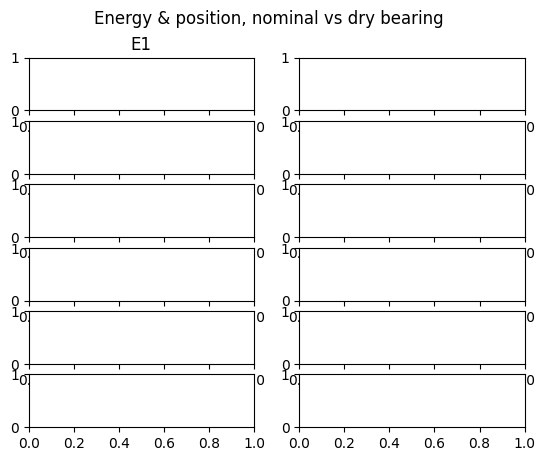

In [ ]:
tab, oil_leak = plt.subplots(6, 2)

tab.suptitle('Energy & position, nominal vs dry bearing')
#plt.subplots_adjust(bottom=0, right=1.5, top=2)
#plt.tight_layout()
for i in range(6):
    oil_leak[i, 0].set_title('E' + str(i+1))
    oil_leak[i, 0].plot(datasets["nominal"][['E' + str(i+1)]].values)
    oil_leak[i, 0].plot(datasets["dry"][['E' + str(i+1)]].values)

    oil_leak[i, 1].set_title('P' + str(i+1))
    oil_leak[i, 1].plot(datasets["nominal"][['P' + str(i+1)]].values)
    oil_leak[i, 1].plot(datasets["dry"][['P' + str(i+1)]].values)

TypeError: list indices must be integers or slices, not list

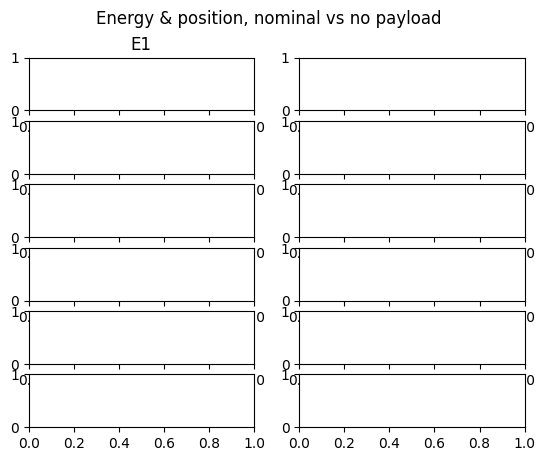

In [ ]:
tab, oil_leak = plt.subplots(6, 2)

tab.suptitle('Energy & position, nominal vs no payload')
#plt.subplots_adjust(bottom=0, right=1.5, top=2)
#plt.tight_layout()
for i in range(6):
    oil_leak[i, 0].set_title('E' + str(i+1))
    oil_leak[i, 0].plot(datasets["nominal"][['E' + str(i+1)]].values, c='r')
    oil_leak[i, 0].plot(datasets["nop"][['E' + str(i+1)]].values, c='b')

    oil_leak[i, 1].set_title('P' + str(i+1))
    oil_leak[i, 1].plot(datasets["nominal"][['P' + str(i+1)]].values)
    oil_leak[i, 1].plot(datasets["nop"][['P' + str(i+1)]].values)

TypeError: list indices must be integers or slices, not list

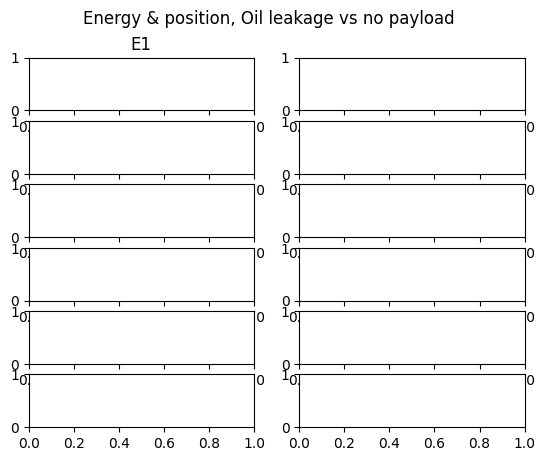

In [ ]:
tab, oil_leak = plt.subplots(6, 2)

tab.suptitle('Energy & position, Oil leakage vs no payload')
#plt.subplots_adjust(bottom=0, right=1.5, top=2)
#plt.tight_layout()
for i in range(6):
    oil_leak[i, 0].set_title('E' + str(i+1))
    oil_leak[i, 0].plot(datasets["nop"][['E' + str(i+1)]].values, c='r')
    oil_leak[i, 0].plot(datasets["dry"][['E' + str(i+1)]].values, c='b')

    oil_leak[i, 1].set_title('P' + str(i+1))
    oil_leak[i, 1].plot(datasets["nop"][['P' + str(i+1)]].values, c='r')
    oil_leak[i, 1].plot(datasets["dry"][['P' + str(i+1)]].values, c='b')

TypeError: list indices must be integers or slices, not list

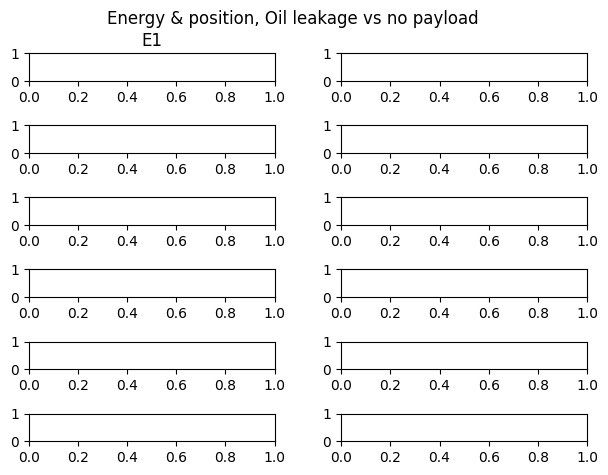

In [ ]:
tab, oil_leak = plt.subplots(6, 2)

tab.suptitle('Energy & position, Oil leakage vs no payload')
plt.subplots_adjust(bottom=0, right=1.5, top=2)
plt.tight_layout()
for i in range(6):
    oil_leak[i, 0].set_title('E' + str(i+1))
    oil_leak[i, 0].plot(datasets["nop"][['E' + str(i+1)]].values, c='r')
    oil_leak[i, 0].plot(datasets["dry"][['E' + str(i+1)]].values, c='b')
    oil_leak[i, 0].plot(datasets["nominal"][['E' + str(i+1)]].values, c='g')
    oil_leak[i, 0].plot(datasets["oil"][['E' + str(i+1)]].values, c='y')

    oil_leak[i, 1].set_title('P' + str(i+1))
    oil_leak[i, 1].plot(datasets["nop"][['P' + str(i+1)]].values, c='r')
    oil_leak[i, 1].plot(datasets["dry"][['P' + str(i+1)]].values, c='b')
    oil_leak[i, 1].plot(datasets["nominal"][['P' + str(i+1)]].values, c='g')
    oil_leak[i, 1].plot(datasets["oil"][['P' + str(i+1)]].values, c='y')

# TESTING

Piccolo set di funzioni test per elaborare il dataset a seguito delle considerazioni emerse dai plot e dalle statistiche dei vari cicli di lavoro, abbiamo optato per una riduzione del dataset utilizzando standard deviation e media per ogni dataframe

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def identify_outliers_isolation_forest(data, contamination=0.05):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(data)
    outlier_indices = np.where(outliers == -1)
    return outlier_indices[0]


In [15]:
import scipy.stats as stats
import scipy

def extract_features(df):
    df = df[["E1","E2", "E3", "E5", "E4", "E6"]]
    

    return df.std().tolist() + df.mean().tolist()

def reduce_feature(df):
    n_components = 2
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(df)
    return reduced_data


def extract_features_pca(df):
    df = df[["E1","E2", "E3", "E5", "E4", "E6"]]
    l = df.std().tolist() + df.mean().tolist() + [df.min().mean()] + [df.max().mean()]
    pca = PCA(n_components=3)
    mean = pd.DataFrame(pca.fit_transform(df)).mean()
    return {"1": mean[0], "2": mean[1], "3": mean[2], "4": mean[3]}


def prepare_data(all_df_list, all_list, remove_outliers=False):
    df_list = []
    df_val = []
    tmp = []
    df_labels = []
    lof = LocalOutlierFactor(n_neighbors=5)  # Adjust the contamination parameter as needed
    for k, v in all_list.items():
        tmp = []
        if k != "test":
            for df in v:
                f = extract_features(df)
                df_list.append(f)
                df_labels.append(df["encoded_labels"][0])
                tmp.append(f)
            if remove_outliers:
                reduced_tmp = pd.DataFrame(tmp)
                outliers = lof.fit_predict(tmp)
                outliers = np.where(outliers == -1)[0]
                ix_list = [len(df_list) - len(tmp) + e for e in outliers]
                df_list = [v for i, v in enumerate(df_list) if i not in ix_list]
                df_labels = [v for i, v in enumerate(df_labels) if i not in ix_list]

    for df in all_list["test"]:
        df_val.append(extract_features(df))
    reduced_df = pd.DataFrame(df_list)

    df_val = pd.DataFrame(df_val)

    return reduced_df, df_val, df_labels, df_list

reduced_df, df_val, df_labels, df_list = prepare_data(all_df_list, all_list, remove_outliers=False)

### Train test splitting

Divisione del DS in train e test per effettuare una valutazione dell'accuratezza del modelo su un set di dati mai visto prima, concateniamo in fine anche il dataset di test (unlabeled) su cui effettuare l'inference

In [16]:
# train_x, test_x, train_y, test_y = train_test_split(df_list, df_labels, test_size=0.2, random_state=42)
import random
random.seed(42)
def split_train_test(df_list, df_labels, perc):
    indices = list(range(len(df_list)))
    random.shuffle(indices)
    train_indices = indices[:int(perc * len(df_list))]
    test_indices = indices[int(perc * len(df_list)):]
    train_x = [df_list[i] for i in train_indices]
    test_x = [df_list[i] for i in test_indices]
    train_y = [df_labels[i] for i in train_indices]
    test_y = [df_labels[i] for i in test_indices]
    test_lab = [k for k, v in zip(test_x, test_y) if  v==0]
    test_lab_y = [ v for k, v in zip(test_x, test_y) if  v==0]
    return pd.DataFrame(train_x), pd.DataFrame(test_x), train_y, test_y, pd.DataFrame(test_lab), test_lab_y

train_x, test_x, train_y, test_y, test_lab, test_lab_y = split_train_test(df_list, df_labels, 0.9)

## Train

A seguito di qualche test, su altri approcci, abbiamo optato per un banale k-means clustering sui dati estratti in precedenza effettuando un training sul dataset di train e una predizione su quello di test per valutarne le prestazioni.
Notando una grossa discrepanza tra diversi cicli dello stesso "dryberrings" all interno del clustering, abbiamo deciso di lasciare il clustering analizzare 5 gruppi per poi rimappare gli stessi dryberrings a posteriori
Sia sul train che sul test l'accuracy del nostro k-means è 1

In [17]:

from sklearn.cluster import AgglomerativeClustering
import numpy as np
import random
import matplotlib.patches as mpatches

def map_labels(labels, train_y):
	train_y = np.array(train_y)
	map_int = {}
	for i in range(max(labels) + 1):
		idx = np.argwhere(labels == i)
		if len(idx) == 0:
			continue
		vals, counts = np.unique(train_y[idx], return_counts=True)
		idx_max = np.argmax(counts)
		map_int[i] = vals[idx_max] 
	return [map_int[l] for l in labels], map_int

np.random.seed(42)

kmeans = KMeans(n_init=10 ,n_clusters=5, random_state=42)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_x)

labels = kmeans.fit_predict(scaled_features)

labels, map_int = map_labels(labels, train_y)
# print(train_y)

	
	

	# print(counts)
	# print(idx)

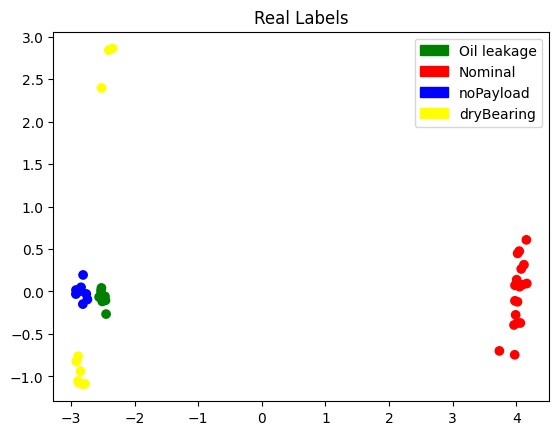

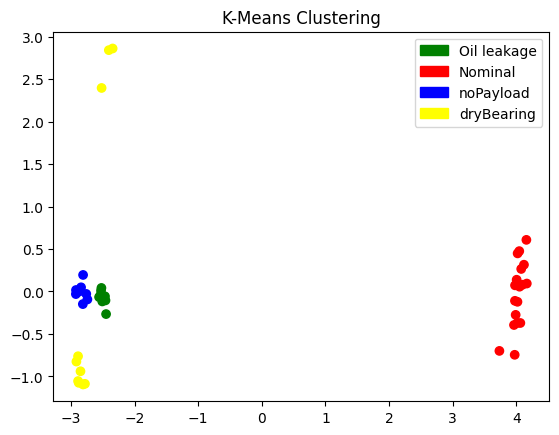

Accuracy on train set:  1.0
1.0
[[ 9  0  0  0]
 [ 0 18  0  0]
 [ 0  0  8  0]
 [ 0  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [18]:


plotting_features = train_x.copy()
plotting_features["cluster"] = labels



id2label_y={0:"Oil leakage", 1:"Nominal", 2: "noPayload", 3:"dryBearing"}
id2color = {1:"red", 0:"green", 2: "blue", 3:"yellow"}



# Plotting using reduced features
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
# Plot Real Labels
c = [id2color[l] for l in train_y]
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=c)
plt.title('Real Labels')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()
c = [id2color[l] for l in plotting_features["cluster"].values]
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=c)
plt.title('K-Means Clustering')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()


errors = 0
accuracy = 0
for i in range(len(train_x)):
    if id2label_y[plotting_features["cluster"].values[i]] != id2label_y[train_y[i]]:
        print("Error", id2label_y[plotting_features["cluster"].values[i]],id2label_y[train_y[i]])
        errors += 1

accuracy = 1 - errors/len(train_x)
print("Accuracy on train set: ", accuracy)

# metrics from sklearn

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(train_y, plotting_features["cluster"].values))
print(confusion_matrix(train_y, plotting_features["cluster"].values))
print(classification_report(train_y, plotting_features["cluster"].values))


### Testing only OilLeakage

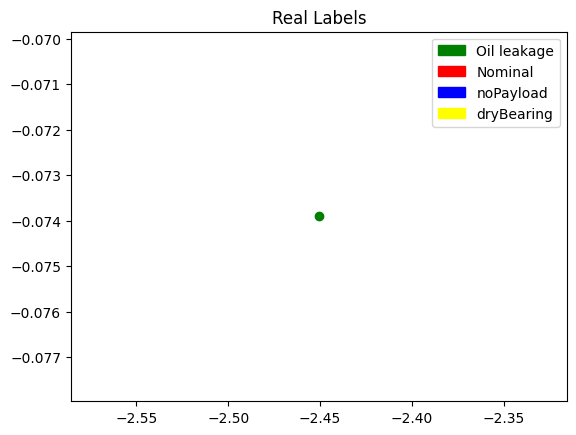

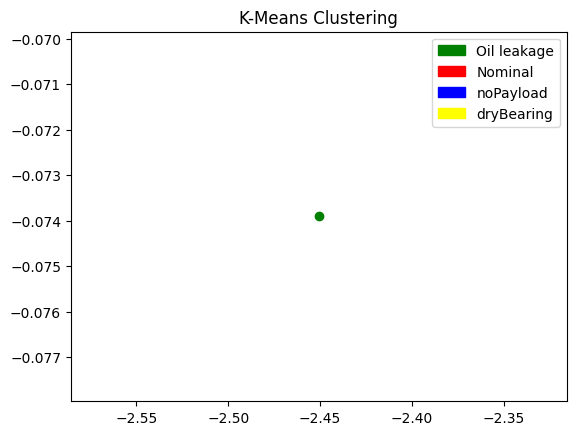

In [19]:

scaled_test_features = scaler.transform(test_lab)
test_labels = kmeans.predict(scaled_test_features)

# test_labels = map_labels(test_labels, test_lab_y)
test_labels = [map_int[l] for l in test_labels]

plotting_test_features = test_lab.copy()
plotting_test_features["cluster"] = test_labels
plotting_test_features["encoded_labels"] = test_lab_y

reduced_test_features = pca.transform(scaled_test_features)
c = [id2color[l] for l in test_lab_y]
plt.scatter(reduced_test_features[:, 0], reduced_test_features[:, 1], c=c)
plt.title('Real Labels')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()


c = [id2color[l] for l in plotting_test_features["cluster"].values]
plt.scatter(reduced_test_features[:, 0], reduced_test_features[:, 1], c=c)
plt.title('K-Means Clustering')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()






## Testing Dataset

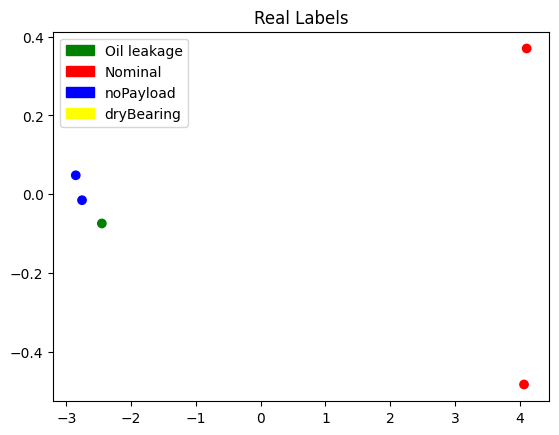

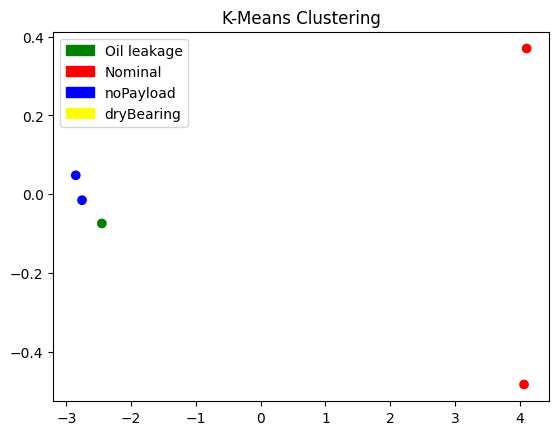

Accuracy on test set:  1.0


In [20]:

scaled_test_features = scaler.transform(test_x)
test_labels = kmeans.predict(scaled_test_features)

test_labels = [map_int[l] for l in test_labels]

plotting_test_features = test_x.copy()
plotting_test_features["cluster"] = test_labels
plotting_test_features["encoded_labels"] = test_y

reduced_test_features = pca.transform(scaled_test_features)
c = [id2color[l] for l in test_y]
plt.scatter(reduced_test_features[:, 0], reduced_test_features[:, 1], c=c)
plt.title('Real Labels')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()

c = [id2color[l] for l in plotting_test_features["cluster"].values]
plt.scatter(reduced_test_features[:, 0], reduced_test_features[:, 1], c=c)
plt.title('K-Means Clustering')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()


errors = 0
accuracy = 0
for i in range(len(test_x)):
    if id2label_y[plotting_test_features["cluster"].values[i]] != id2label_y[test_y[i]]:
        print("Error", id2label_y[plotting_test_features["cluster"].values[i]],id2label_y[test_y[i]])
        errors += 1

accuracy = 1 - errors/len(test_x)
print("Accuracy on test set: ", accuracy)


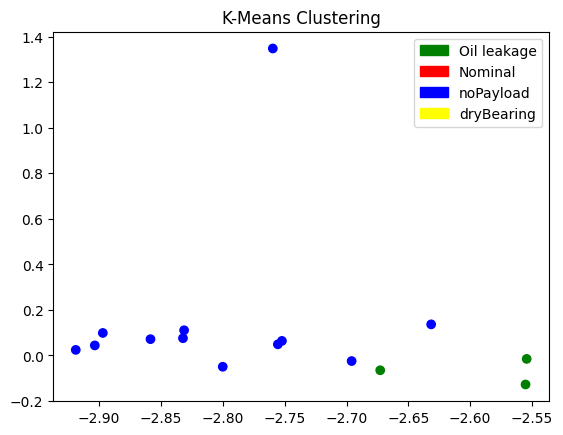

In [21]:

scaled_test_features = scaler.transform(df_val)
val_labels = kmeans.predict(scaled_test_features)

val_labels = [map_int[l] for l in val_labels]

plotting_val_features = df_val.copy()
plotting_val_features["cluster"] = val_labels
reduced_val_features = pca.transform(scaled_test_features)
c = [id2color[l] for l in plotting_val_features["cluster"].values]
plt.scatter(reduced_val_features[:, 0], reduced_val_features[:, 1], c=c)
plt.title('K-Means Clustering')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()

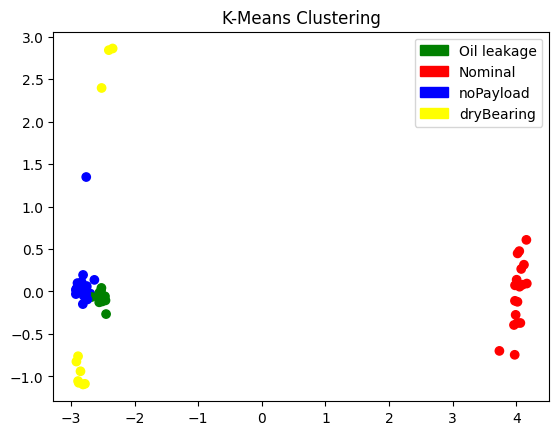

In [22]:


total_df = pd.concat([df_val, train_x])
scaled_total_features = scaler.transform(total_df)
total_labels = kmeans.predict(scaled_total_features)

total_labels = [map_int[l] for l in total_labels]

plotting_total_features = total_df.copy()
plotting_total_features["cluster"] = total_labels
reduced_total_features = pca.transform(scaled_total_features)

c = [id2color[l] for l in plotting_total_features["cluster"].values]

plt.scatter(reduced_total_features[:, 0], reduced_total_features[:, 1], c=c)
plt.title('K-Means Clustering')
plt.legend(handles=[mpatches.Patch(color=id2color[i], label=id2label_y[i]) for i in id2label_y.keys()])
plt.show()


In [24]:

def inference_on_new_cycle(cycle, kmeans, scaler, pca, id2label_y, one_cycle_df):
	features = extract_features(one_cycle_df)
	scaled_features = scaler.transform([features])
	reduced_features = pca.transform(scaled_features)
	label = kmeans.predict(scaled_features)
	label = map_int[label[0]]
	print(f"Cycle {cycle} is predicted as {id2label_y[label]}")
	return reduced_features

inference_on_new_cycle(1, kmeans, scaler, pca, id2label_y, all_list["test"][4])

Cycle 1 is predicted as Oil leakage


array([[-2.55523392, -0.1274521 ]])